# **Penguin Clustering | PCA | K-means **

The goal of this analysis is to cluster penguin species based on their physical characteristics using **Principal Component Analysis (PCA)** followed by both **K-means and Hierarchical Clustering methods.**

The dataset contains measurements such as culmen length, culmen depth, flipper length, body mass, and sex of penguins. By applying PCA, we will reduce the dimensionality of the data to focus on the most significant features. We will then use K-means clustering to identify distinct groups of penguins, potentially corresponding to different species or other meaningful classifications.




# **Importing the Essential Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Importing the dataset**

In [2]:
dataset = pd.read_csv("/content/penguins.csv")

# **Exploratory Data Analysis**

In [3]:
#Examining the first 10 rows of the dataset.
dataset.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [5]:
dataset.tail(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,46.2,14.1,217.0,4375.0,FEMALE
335,55.1,16.0,230.0,5850.0,MALE
336,44.5,15.7,217.0,4875.0,.
337,48.8,16.2,222.0,6000.0,MALE
338,47.2,13.7,214.0,4925.0,FEMALE
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [4]:
#Inspecting the shape, or dimensions, of the dataset.
dataset.shape

(344, 5)

In [6]:
#Examining the data types of each column and counting the number of non-null values in those columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


**1. culmen_length_mm, culmen_depth_mm, flipper_length_mm, and body_mass_g:** All have 342 non-null values out of 344 entries, meaning that each of these columns has 2 missing values. These columns are of the data type float64.

**2. sex:** This column has 335 non-null values out of 344 entries, meaning there are 9 missing values. The data type for this column is object, which means it contains text or categorical data.

In [7]:
#Obtaining the statistical summary of the dataset.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [8]:
# Handling missing values
dataset.dropna(inplace=True)

dataset.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


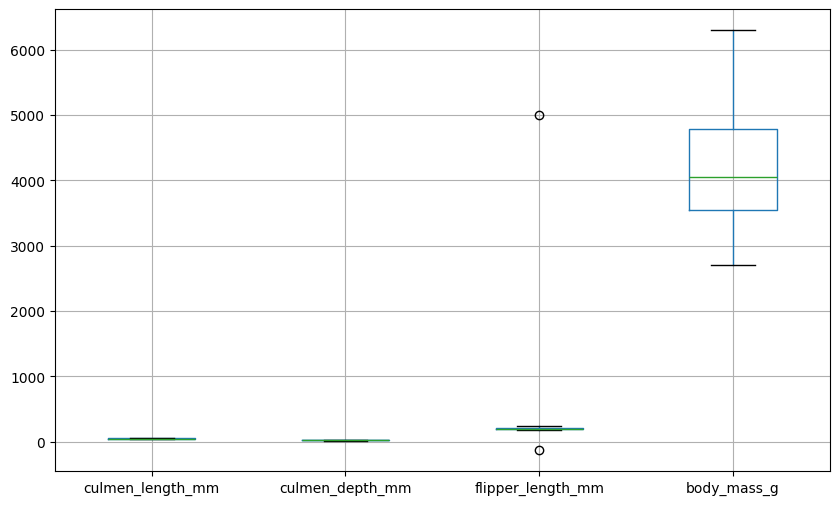

In [9]:
#Checking for outliers

plt.figure(figsize=(10, 6))
dataset.boxplot()
plt.show()

In [10]:
sum(dataset['flipper_length_mm'] > 4000)

1

In [11]:
#Filter out rows with incorrect or placeholder values in the 'sex' column
dataset = dataset.loc[dataset['sex'].isin(['MALE', 'FEMALE'])]

#Filter out outliers
dataset = dataset[(dataset['flipper_length_mm'].between(0, 4000))]

#Reset index
dataset.reset_index(drop=True, inplace=True)

dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
#Checking for any duplicates in the columns.
dataset.duplicated().sum()

0

# **Encoding categorical data**

In [16]:
dataset = pd.get_dummies(dataset, drop_first=True)

dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True


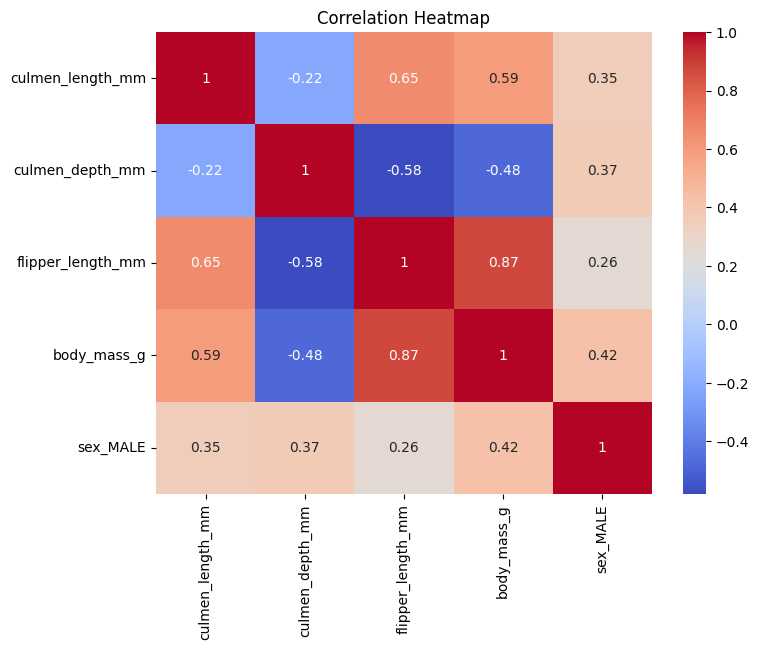

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Feature Scaling**

**Standardizing features is important because:**

* **Equal Contribution:** Ensures each feature contributes equally to the model.
* **Enhances Stability:** Reduces computational issues by normalizing data.

In [18]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
scaled = Scaler.fit_transform(dataset)
dataset_scaled = pd.DataFrame(scaled, columns=dataset.columns)

print(dataset_scaled.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0         -0.903906         0.790360          -1.425342    -0.566948  0.993994
1         -0.830434         0.126187          -1.068577    -0.504847 -1.006042
2         -0.683490         0.432728          -0.426399    -1.187953 -1.006042
3         -1.344738         1.096901          -0.569105    -0.939551 -1.006042
4         -0.867170         1.761074          -0.783164    -0.691149  0.993994


# **Principal Component Analysis (PCA)**

**Applying PCA before clustering in our task serves to:**

* **Reduce dimensionality:** Making the data more manageable and highlighting the most important features.
* **Enhance clustering:** By focusing on the most informative components, it improves the accuracy and performance of the clustering algorithm.



In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca_dataset = pca.fit(dataset_scaled)

pca_dataset.explained_variance_ratio_

array([0.56820593, 0.28153159, 0.09633697, 0.03399271, 0.01993278])

The PCA process has identified that the first two principal components (56.8% and 28.2%) capture the majority of the variance in the data.

This suggests that reducing the dataset to two dimensions (using these first two components) would still retain a significant amount of the original information, making it a good candidate for further analysis or visualization.

In [20]:
pca = PCA(n_components = 2)
pca_dataset = pca.fit_transform(dataset_scaled)

# **K-Means Clustering**

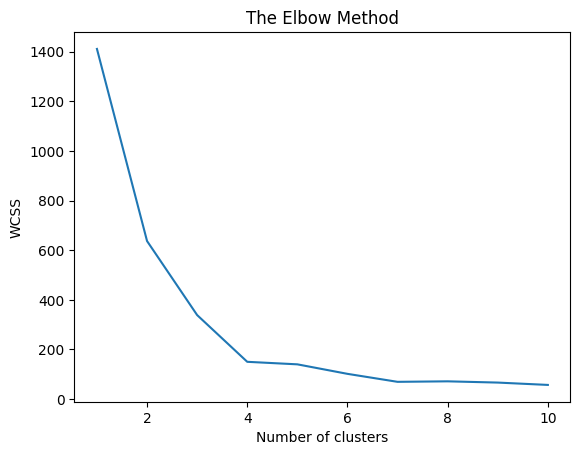

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method helps us visually determine the ideal number of clusters by plotting WCSS against the number of clusters.

The point where the curve starts to flatten (the "elbow") indicates the optimal number of clusters. In this output, the elbow is around 3 or 4 clusters, suggesting that this is the most appropriate number of clusters for our K-Means algorithm.

# **Training the K-Means model on the dataset**

In [22]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_dataset)

# **Visualising the clusters**

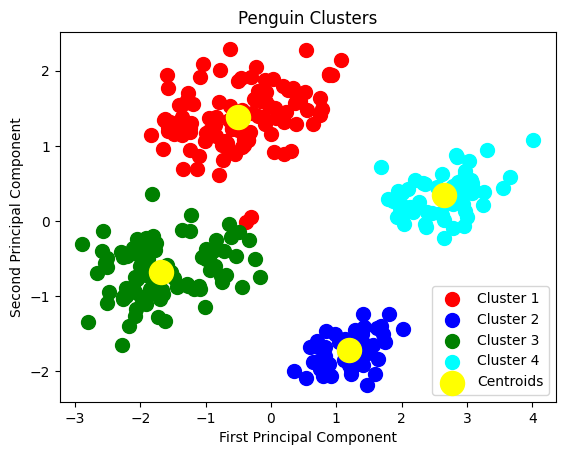

In [23]:
plt.scatter(pca_dataset[y_kmeans == 0, 0], pca_dataset[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_dataset[y_kmeans == 1, 0], pca_dataset[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_dataset[y_kmeans == 2, 0], pca_dataset[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_dataset[y_kmeans == 3, 0], pca_dataset[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Penguin Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()